In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

Filling the Missing values:

In [3]:
df['Glucose'] = df['Glucose'].replace(0,np.mean(df['Glucose']))
df['BloodPressure'] = df['BloodPressure'].replace(0,np.mean(df['BloodPressure']))
df['SkinThickness'] = df['SkinThickness'].replace(0,np.mean(df['SkinThickness']))
df['Insulin'] = df['Insulin'].replace(0,np.mean(df['Insulin']))
df['BMI'] = df['BMI'].replace(0,np.mean(df['BMI']))

Plotting the feature variable to know the relationship:

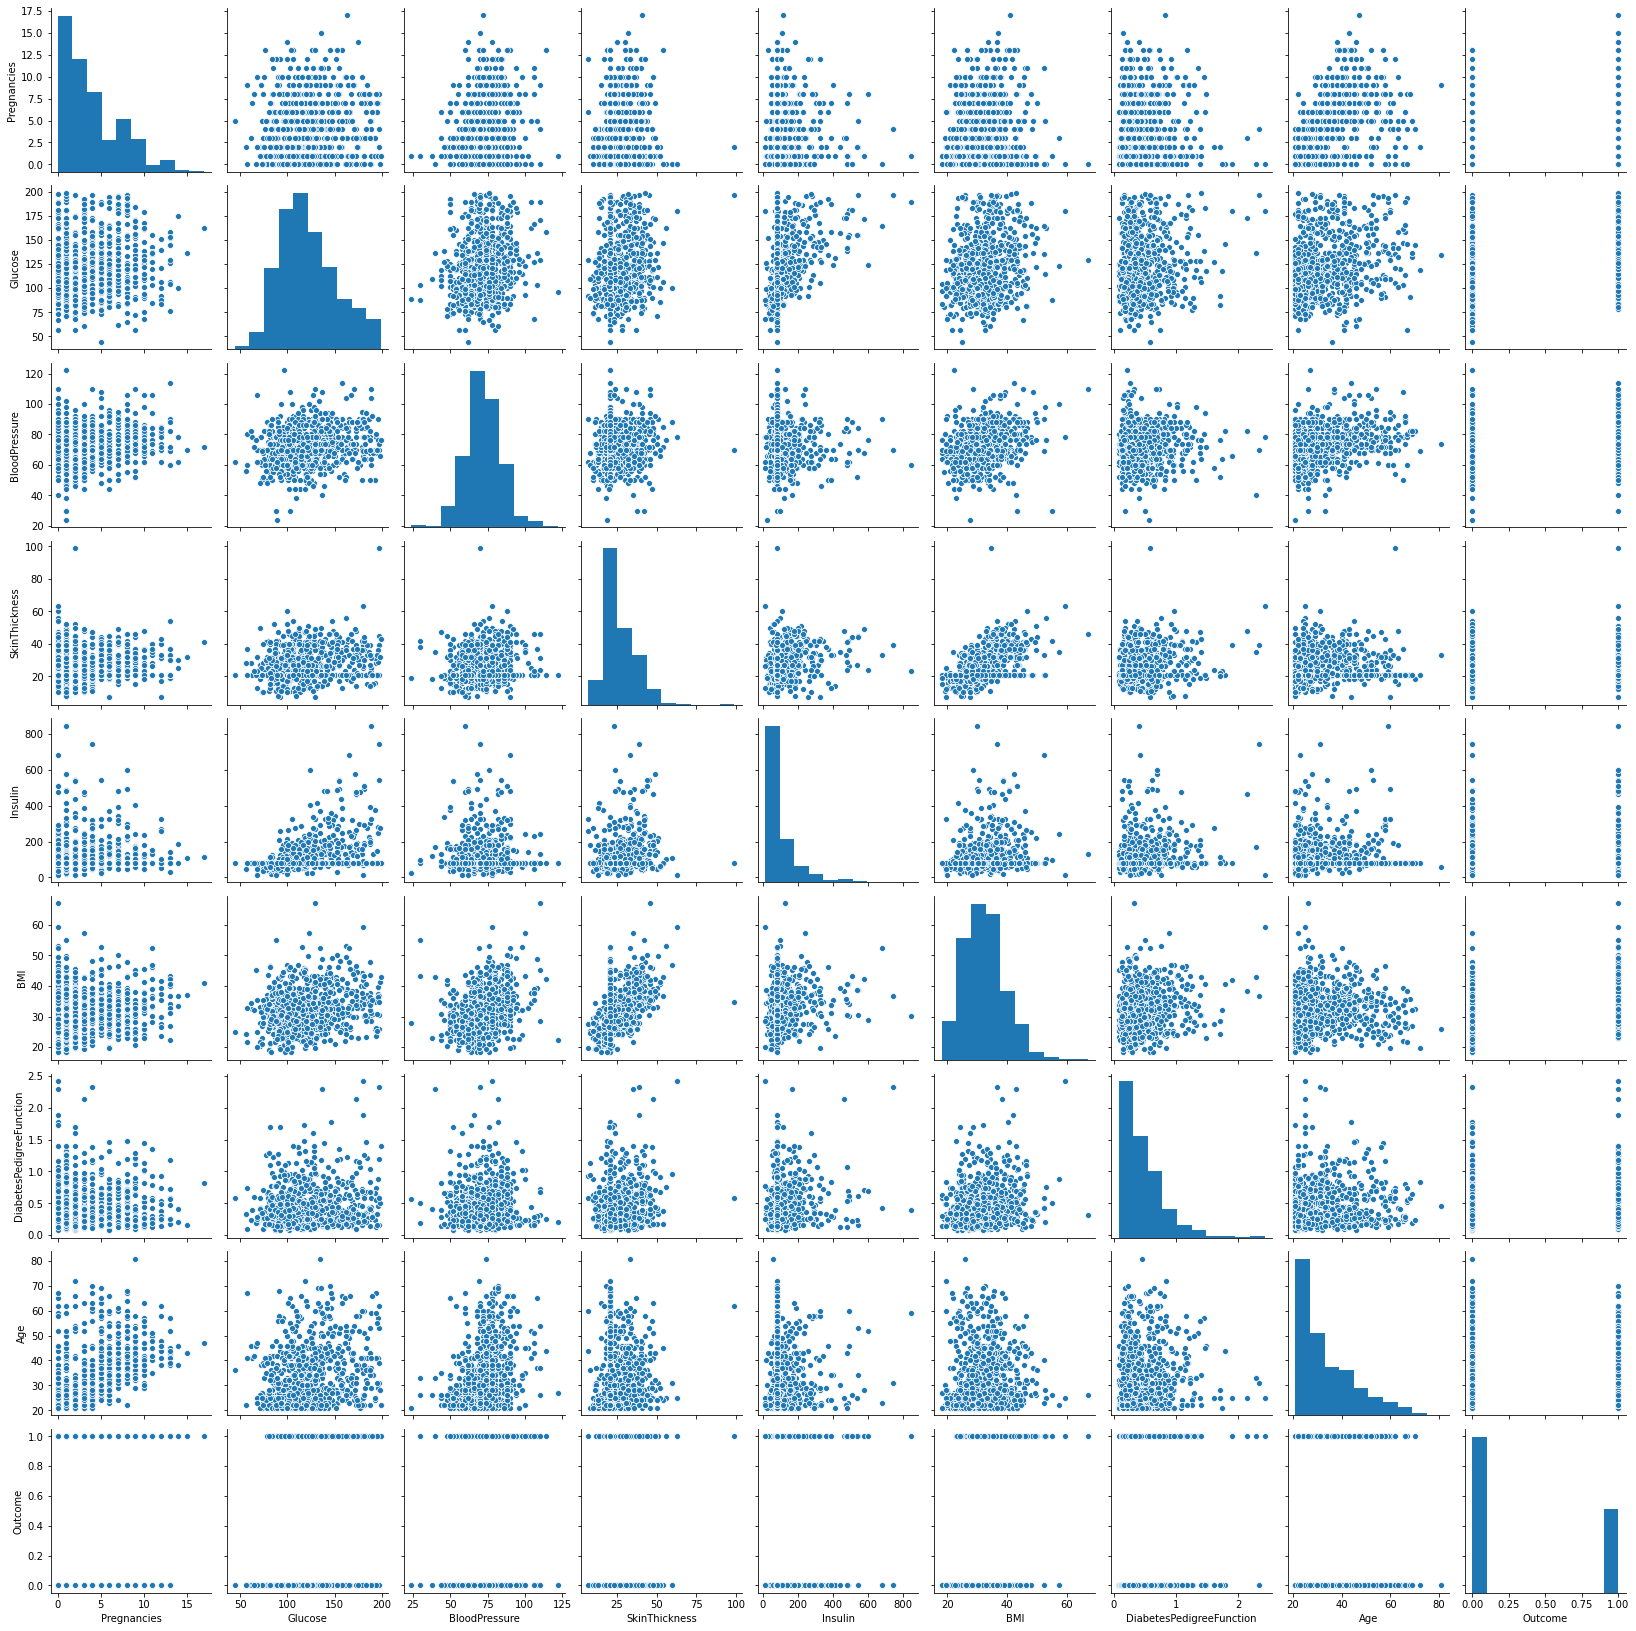

In [4]:
sns.pairplot(df)

In [5]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]

Feature Selection:

In [6]:
feature = SelectKBest(score_func=chi2, k='all')
feat = feature.fit(x, y)
dfscores = pd.DataFrame(feat.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores)

                      Specs        Score
0               Pregnancies   111.519691
1                   Glucose  1418.660636
2             BloodPressure    41.394665
3             SkinThickness    81.917622
4                   Insulin  1798.088682
5                       BMI   108.937867
6  DiabetesPedigreeFunction     5.392682
7                       Age   181.303689


In [7]:
x1 = df.drop(['DiabetesPedigreeFunction','Outcome'], axis=1)
y1 = df["Outcome"]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(x1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=42)

Creating a simple model:

In [10]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(x_test)

Evaluating the model:

In [12]:
f1 = f1_score(y_test, y_pred)
print('F1 Score:',f1)

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:',acc)

conf = confusion_matrix(y_test, y_pred)
print(conf)

F1 Score: 0.5815602836879432
Accuracy Score: 0.6927083333333334
[[92 31]
 [28 41]]


In [13]:
np.sqrt(len(x_test))

13.856406460551018

Creating a model with K=13:

In [14]:
KNN = KNeighborsClassifier(n_neighbors=13)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [15]:
Y_pred = KNN.predict(x_test)

In [16]:
f = f1_score(y_test, Y_pred)
print('F1 Score:',f)

acc1 = accuracy_score(y_test, Y_pred)
print('Accuracy Score:',acc1)

conf1 = confusion_matrix(y_test, Y_pred)
print(conf1)

F1 Score: 0.6153846153846154
Accuracy Score: 0.7395833333333334
[[102  21]
 [ 29  40]]


Hyperparameter Tuning:

In [17]:
param = {'n_neighbors': range(1,21,1), 'metric':['euclidean','minkowski'], 'weights':['uniform','distance']}

In [18]:
grid = GridSearchCV(estimator=knn, param_grid=param, n_jobs=-1, cv=5)
grid.fit(X, y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']})

Finding the best parameter and scores:

In [19]:
print("Best parameter:",grid.best_params_)
print("Best Score:",grid.best_score_)

Best parameter: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
Best Score: 0.7787029963500551


In [20]:
rand = RandomizedSearchCV(estimator=knn, param_distributions=param, cv=5, n_jobs=-1, random_state=42)
rand.fit(X, y1)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'minkowski'],
                                        'n_neighbors': range(1, 21),
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [21]:
print("Best parameter:",rand.best_params_)
print("Best Score:",rand.best_score_)

Best parameter: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean'}
Best Score: 0.7734572616925558
